## Check turbulent magnetic generation

This script aims to check the conformity of the the magnetic field generated in simulation with the one described in:
* Tautz and Dosch 2013 - http://arxiv.org/abs/1301.7164

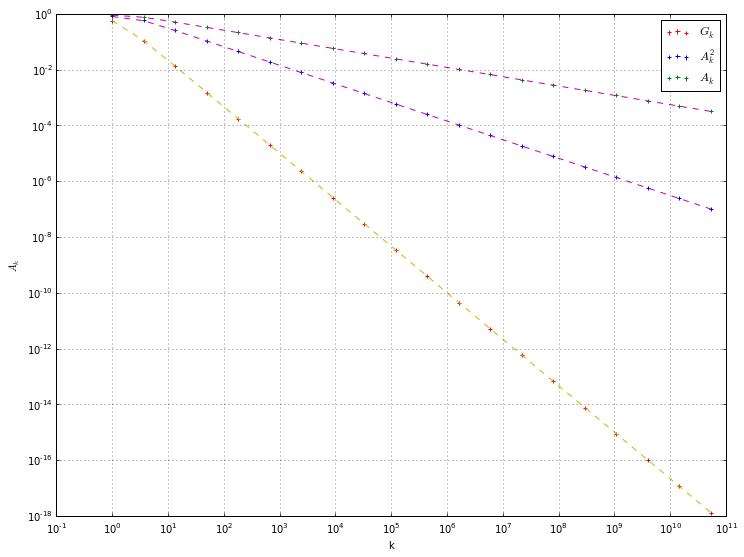

In [3]:
%matplotlib inline
from numpy import loadtxt, mean, arange, shape, sqrt
from matplotlib.pyplot import show, hist, subplots, suptitle

def G_k(k,q,s):
   return k**q / (1+k**2)**(float(q+s)/2)

def A_k(k,alpha,q,s):
   delta_kn = (1-1/alpha)*k
   return G_k(k,q,s)*delta_kn

f,ax = subplots(figsize=(12,9))
k,delta_k,Gk,Ak=loadtxt("Results/Ak.dat",unpack=True)

ax.scatter(k,Gk,color='r',marker='+',label="$G_k$")
ax.scatter(k,Ak*2,color='b',marker='+',label="$A_k^2$")
ax.scatter(k,sqrt(Ak*2),color='g',marker='+',label="$A_k$")
#ax.scatter(k,delta_k,color='g',marker='+',label="$\delta k$")

Nm = shape(k)[0]
kmin = min(k)
kmax = max(k)
alpha = (kmax/kmin)**(1./Nm)
s=5/3.
q=0
kn = kmin*(kmax/kmin)**(arange(Nm)/(Nm-1.))
ax.plot(kn,G_k(kn,q,s),'--y',linewidth=1)
ax.plot(kn,A_k(kn,alpha,q,s)*2,'--m',linewidth=1)
ax.plot(kn,sqrt(A_k(kn,alpha,q,s)*2),'--m',linewidth=1)

ax.grid(b=True,which='major')
ax.legend(loc="best")
ax.set_xlabel('k')
ax.set_ylabel('$A_k$')
ax.set_xscale('log')
ax.set_yscale('log')

show()


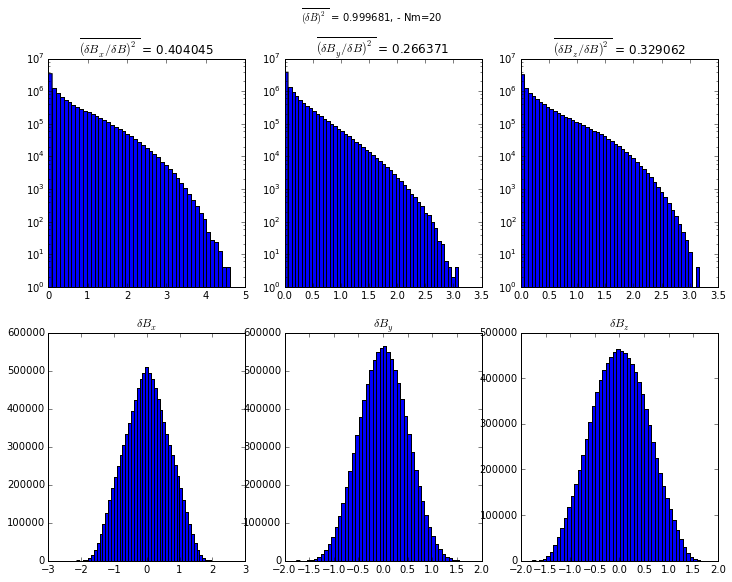

In [1]:
%matplotlib inline
from numpy import loadtxt, mean, arange, shape, sqrt
from matplotlib.pyplot import show, hist, subplots, suptitle

nbBins=50
Mpc=(3.0856776e+16)*1e8 # Mpc to cm
Nm=20

x,y,z,Bx,By,Bz,B2=loadtxt("Results/turbulent_EGMF.dat",unpack=True)

f,ax = subplots(2,3,figsize=(12,9))

ax[0,0].hist(Bx**2,nbBins)
ax[0,1].hist(By**2,nbBins)
ax[0,2].hist(Bz**2,nbBins)
ax[0,0].set_title("$\overline{(\delta B_x/\delta B)^2}$ = %f"%(mean(Bx[B2!=0]**2/B2[B2!=0])))
ax[0,1].set_title("$\overline{(\delta B_y/\delta B)^2}$ = %f"%(mean(By[B2!=0]**2/B2[B2!=0])))
ax[0,2].set_title("$\overline{(\delta B_z/\delta B)^2}$ = %f"%(mean(Bz[B2!=0]**2/B2[B2!=0])))
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[0,2].set_yscale('log')

suptitle("$\overline{(\delta B)^2}$ = %f, - Nm=%i"%(mean(B2),Nm))

ax[1,0].hist(Bx,nbBins)
ax[1,1].hist(By,nbBins)
ax[1,2].hist(Bz,nbBins)
ax[1,0].set_title("$\delta B_x$")
ax[1,1].set_title("$\delta B_y$")
ax[1,2].set_title("$\delta B_z$")

show()

# Test lepton trajectory

In [2]:
from matplotlib.pyplot import figure, show
from mpl_toolkits.mplot3d import Axes3D
from numpy import loadtxt

Mpc=(3.0856776e+16)*1e8 # Mpc to cm

x,y,z,ux,uy,uz = loadtxt('Results/lepton_deflection.dat',unpack=True)

fig = figure()
#ax = fig.add_subplot(111,projection='3d')
#
#ax.quiver(x/Mpc,y/Mpc,z/Mpc,ux,uy,uz,length=20)
#
#ax.legend(loc="best")
#ax.set_xlabel("x [Mpc]")
#ax.set_ylabel("y[Mpc]")
#ax.set_zlabel("z [Mpc]")

ax = fig.add_subplot(111)

ax.quiver(x/Mpc,z/Mpc,ux,uz)
ax.plot(x/Mpc,z/Mpc)
ax.scatter(x[0]/Mpc,z[0]/Mpc,marker='o',color='r')

ax.grid(b=True,which='major')
ax.set_xlabel("x [Mpc]")
ax.set_ylabel("z [Mpc]")

show()

/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:823: UserWarning: loadtxt: Empty input file: "Results/lepton_deflection.dat"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


ValueError: need more than 0 values to unpack